In [1]:
import os    
#os.environ['THEANO_FLAGS'] = "device=gpu1"  
#os.environ["THEANO_FLAGS"] = "mode=FAST_RUN,device=gpu0,floatX=float32,lib.cnmem=1"
os.environ["THEANO_FLAGS"] = "mode=FAST_RUN,device=gpu0,floatX=float32"

import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Dropout, Activation, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.utils import np_utils
from keras.callbacks import LearningRateScheduler
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.optimizers import *

from keras.constraints import maxnorm
from keras.datasets import cifar10

from matplotlib import pyplot as plt
%matplotlib inline


/home/mrafi123/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
Using Theano backend.


Couldn't import dot_parser, loading of dot files will not be possible.


WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 0: GeForce 920M (CNMeM is disabled, cuDNN not available)


In [2]:
# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [3]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [4]:

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [5]:
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(50000, 3, 32, 32)
(50000, 10)
(10000, 3, 32, 32)
(10000, 10)


In [15]:
# Reinstallise models 
img_size = 32

def cnn_model():
    # this is our input placeholder
    input_img = Input(shape=(3,32,32))
    x = Convolution2D(32, 3, 3, activation='relu', border_mode='same')(input_img)
    x = Dropout(0.2)(x)
    x = Convolution2D(32, 3, 3, activation='relu', border_mode='same')(x)
    x = MaxPooling2D((2, 2), border_mode='same')(x)

    x = Convolution2D(64, 3, 3, activation='relu', border_mode='same')(x) 
    x = Dropout(0.2)(x)
    x = Convolution2D(64, 3, 3, activation='relu', border_mode='same')(x) 
    x = MaxPooling2D((2, 2), border_mode='same')(x)
    x = Dropout(0.2)(x)

    x = Convolution2D(128, 3, 3, activation='relu', border_mode='same')(x) 
    x = Dropout(0.2)(x)
    x = Convolution2D(128, 3, 3, activation='relu', border_mode='same')(x) 
    x = MaxPooling2D((2, 2), border_mode='same')(x)
    x = Dropout(0.2)(x)

    x = Flatten()(x)
    x = Dropout(0.2)(x)
    x= Dense (1024, activation = 'relu', W_constraint=maxnorm(3))(x)
    x = Dropout(0.2)(x)
    x= Dense (512, activation = 'relu', W_constraint=maxnorm(3))(x)
    x = Dropout(0.2)(x)
    encoder= Dense (40, activation = 'sigmoid', W_constraint=maxnorm(3))(x)
    decoder = Dense (num_classes, activation = 'softmax')(encoder)
    autoencoder = Model(input_img, decoder)

    return autoencoder

In [16]:
model2 = cnn_model()


In [17]:
model2

In [18]:



model2 = cnn_model()
modeladam = cnn_model()
modelada = cnn_model()

lr = 0.01

sgd = SGD(lr=lr, decay=1e-5, momentum=0.8, nesterov=True)

model2.compile(loss='categorical_crossentropy',
          optimizer=sgd,
          metrics=['accuracy'])

modeladam.compile(loss='categorical_crossentropy',
          optimizer='adam',
          metrics=['accuracy'])

modelada.compile(loss='categorical_crossentropy',
          optimizer='adadelta',
          metrics=['accuracy'])


#def lr_schedule(epoch):
    #return lr*(0.1**int(epoch/10))

#just force fitting a sigmoid dense layer before softmax

#Epoch 10/50
50000/50000 [==============================] - 230s - loss: 0.7211 - acc: 0.7490 - val_loss: 0.7299 - val_acc: 0.7488

# after changing from sequntial to model
Epoch 5/50
50000/50000 [==============================] - 295s - loss: 1.2006 - acc: 0.5701 - val_loss: 1.2521 - val_acc: 0.5642


In [19]:
# fitting the modelning for 23s in TITAN
# each epoch run
batch_size = 128
epochs = 50

model2.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=epochs)

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 299s - loss: 2.0627 - acc: 0.2260 - val_loss: 1.8649 - val_acc: 0.2882
Epoch 2/50
50000/50000 [==============================] - 298s - loss: 1.7608 - acc: 0.3388 - val_loss: 1.6181 - val_acc: 0.4020
Epoch 3/50
50000/50000 [==============================] - 305s - loss: 1.5168 - acc: 0.4373 - val_loss: 1.3787 - val_acc: 0.4939
Epoch 4/50
50000/50000 [==============================] - 306s - loss: 1.3435 - acc: 0.5098 - val_loss: 1.2613 - val_acc: 0.5480
Epoch 5/50
50000/50000 [==============================] - 295s - loss: 1.2006 - acc: 0.5701 - val_loss: 1.2521 - val_acc: 0.5642
Epoch 6/50
  896/50000 [..............................] - ETA: 272s - loss: 1.1023 - acc: 0.6138

KeyboardInterrupt: 

In [2]:
# this is our input placeholder
input_img = Input(shape=(3,32,32))

x = convolutional.Convolution2D(16, 5, 5, activation='relu', border_mode='same')(input_img)
x = convolutional.MaxPooling2D((2, 2), border_mode='same')(x)##64, 14, 14
x = convolutional.Convolution2D(20, 5, 5, activation='relu', border_mode='same')(x) 
x = convolutional.MaxPooling2D((2, 2), border_mode='same')(x) ##32, 6, 6
x = convolutional.Convolution2D(20, 5, 5, activation='relu', border_mode='same')(x) 
##x = convolutional.MaxPooling2D((2, 2), border_mode='same')(x) 
##x = convolutional.Convolution2D(10, 2, 2, activation='relu', border_mode='same')(x)
encoded = convolutional.MaxPooling2D((2, 2), border_mode='same')(x) 

#x = Flatten()(x)
#encoded = Dense(2, activation='sigmoid')(x)
#x= Dense (320, activation = 'relu')(encoded)
#x = Reshape((20,4,4))(x) 
x = convolutional.UpSampling2D((2, 2))(encoded) 
##x = convolutional.Convolution2D(10, 2, 2, activation='relu', border_mode='same')(x)
##x = convolutional.UpSampling2D((2, 2))(x) 
x = convolutional.Convolution2D(20, 5, 5, activation='relu', border_mode='same')(x) 
x = convolutional.UpSampling2D((2, 2))(x) 
x = convolutional.Convolution2D(20, 5, 5, activation='relu', border_mode='same')(x) 
x = convolutional.UpSampling2D((2, 2))(x)
x = convolutional.Convolution2D(16, 5, 5, activation='relu',border_mode='same')(x) 
decoded = convolutional.Convolution2D(3, 5, 5, activation='sigmoid', border_mode='same')(x) 
#x = Flatten()(x) ##3072
#x = Dense(3072, activation='linear')(x)
#decoded = Reshape((3,32,32))(x) ##3, 32, 32
#decoded = convolutional.Convolution2D(3, 5, 5, activation='sigmoid', border_mode='same')(x)
autoencoder = Model(input_img, decoded)
#sgd=SGD(lr=0.002, momentum=0.1, decay=0.0, nesterov=False)
autoencoder.compile(optimizer='Adam', loss='mean_squared_error',metrics=['accuracy'])

autoencoder.summary()

x_train = X_train.astype('float32') / 255.
x_test = X_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print (x_train.shape)
print (x_test.shape)

x_train = x_train.reshape((len(x_train),3,32,32))
x_test = x_test.reshape((len(x_test),3,32,32))
print (x_train.shape)
print (x_test.shape)

In [8]:
# this model maps an input to its encoded representation
#encoding_dim=40
#encoded = convolutional.Convolution2D(3, 5, 5, activation='relu', border_mode='same')(encoded)
encoded = Flatten()(encoded)
#encoded = Dense(encoding_dim, activation='sigmoid')(encoded)
#encoded = convolutional.Convolution2D(3, 5, 5, activation='relu', border_mode='same')(encoded)
#encoded = Reshape((3,32,32))(encoded) ##3, 32, 32

encoder = Model(input_img, encoded)

print (encoder.summary())

In [10]:
nb_epoch=10
batch_size=64
random_state =5578

In [11]:
kfold_weights_path = os.path.join('weights_kfold_' +  'CIFAR10-Conv-AutoEncoder-Ver7.61' +
                                  '_epoch_'+str(nb_epoch)+
                                  '_batch_'+str(batch_size)
                                  +'.h5')
print(kfold_weights_path)

weights_kfold_CIFAR10-Conv-AutoEncoder-Ver7.61_epoch_10_batch_64.h5


In [12]:
os.path.isfile(kfold_weights_path)

False

In [13]:
# Some transfer learning
if os.path.isfile(kfold_weights_path):
    print ('Loading already stored weights...')
    autoencoder.load_weights(kfold_weights_path)
else:
    print ('Training for the first time...')
    

Training for the first time...


In [14]:
noise_factor = 0.2
s_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
s_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

s_train_noisy = np.clip(s_train_noisy, 0., 1.)
s_test_noisy = np.clip(s_test_noisy, 0., 1.)

In [15]:
callbacks = [
                EarlyStopping(monitor='val_loss', patience=2, verbose=1),
                ModelCheckpoint(kfold_weights_path, monitor='val_loss', save_best_only=True, verbose=1),
            ]
autoencoder.fit(s_train_noisy, x_train,
            nb_epoch=nb_epoch,
            batch_size=batch_size,
            shuffle=True,
            validation_data=(s_test_noisy, x_test),
            callbacks=callbacks
            )

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 281s - loss: 0.0327 - acc: 0.0602 - val_loss: 0.0249 - val_acc: 0.0713
Epoch 2/10
50000/50000 [==============================] - 281s - loss: 0.0233 - acc: 0.0779 - val_loss: 0.0228 - val_acc: 0.0829
Epoch 3/10
50000/50000 [==============================] - 282s - loss: 0.0219 - acc: 0.0880 - val_loss: 0.0209 - val_acc: 0.0919
Epoch 4/10
50000/50000 [==============================] - 288s - loss: 0.0193 - acc: 0.0946 - val_loss: 0.0177 - val_acc: 0.0992
Epoch 5/10
50000/50000 [==============================] - 292s - loss: 0.0164 - acc: 0.1040 - val_loss: 0.0158 - val_acc: 0.1010
Epoch 6/10
50000/50000 [==============================] - 293s - loss: 0.0149 - acc: 0.1103 - val_loss: 0.0148 - val_acc: 0.1090
Epoch 7/10
50000/50000 [==============================] - 283s - loss: 0.0142 - acc: 0.1144 - val_loss: 0.0139 - val_acc: 0.1150
Epoch 8/10
50000/50000 [=======================

In [18]:
autoencoder.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 3, 32, 32)     0                                            
____________________________________________________________________________________________________
convolution2d_1 (Convolution2D)  (None, 16, 32, 32)    1216        input_1[0][0]                    
____________________________________________________________________________________________________
maxpooling2d_1 (MaxPooling2D)    (None, 16, 16, 16)    0           convolution2d_1[0][0]            
____________________________________________________________________________________________________
convolution2d_2 (Convolution2D)  (None, 20, 16, 16)    8020        maxpooling2d_1[0][0]             
___________________________________________________________________________________________

In [16]:
reconstructed_test_imgs = autoencoder.predict(x_test)


In [17]:
reconstructed_test_imgs.shape

(10000, 3, 32, 32)

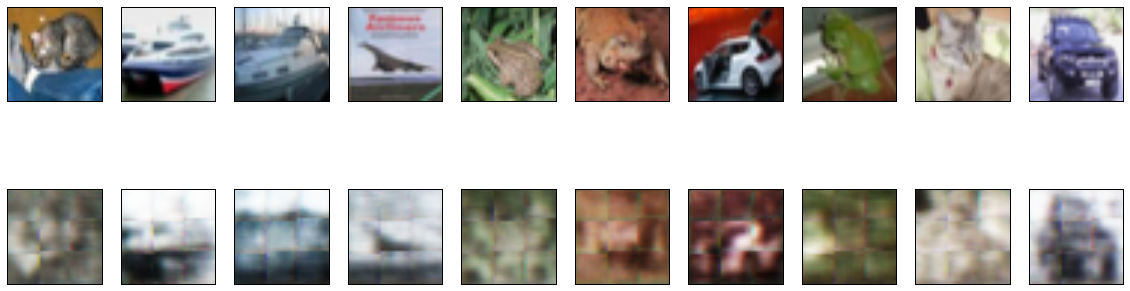

In [18]:
import matplotlib.pyplot as plt

n = 10 # how many digits we will display
plt.figure(figsize=(20, 6))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(32,32,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display encoded
    #ax = plt.subplot(2, n, i + 1 + n)
    #plt.imshow(encoded_imgs[i].reshape(6, 6))
    #plt.gray()
    #ax.get_xaxis().set_visible(False)
    #ax.get_yaxis().set_visible(False)
   
    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed_test_imgs[i].reshape(32,32,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [23]:
print (encoder.summary())

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 3, 32, 32)     0                                            
____________________________________________________________________________________________________
convolution2d_1 (Convolution2D)  (None, 16, 32, 32)    1216        input_1[0][0]                    
____________________________________________________________________________________________________
maxpooling2d_1 (MaxPooling2D)    (None, 16, 16, 16)    0           convolution2d_1[0][0]            
____________________________________________________________________________________________________
convolution2d_2 (Convolution2D)  (None, 20, 16, 16)    8020        maxpooling2d_1[0][0]             
___________________________________________________________________________________________

In [19]:
encoded_train_imgs = encoder.predict(x_train)
print (encoded_train_imgs.size)
print (encoded_train_imgs.shape)
print (encoded_train_imgs.nbytes)

16000000
(50000, 320)
128000000


In [20]:
encoded_test_imgs = encoder.predict(x_test)
print (encoded_test_imgs.size)
print (encoded_test_imgs.shape)
print (encoded_test_imgs.nbytes)

3200000
(10000, 320)
25600000


In [21]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=5)
clf = clf.fit(encoded_train_imgs, y_train)

In [22]:
y_pred = clf.predict(encoded_test_imgs)


In [23]:
y_pred

array([4, 8, 1, ..., 5, 6, 4])

In [24]:
num=len(encoded_test_imgs)
r=0
w=0
for i in range(num):
        #print ('y_pred ',y_pred[i])
        #print ('labels ',labels[i])
        #without the use of all() returns error truth value of an array with more than one element is ambiguous
        #if y_pred[i].all() == labels[i].all():
        if np.array_equal(y_pred[i],y_test[i]):
            r+=1
        else:
            w+=1
print ("tested ",  num, "digits")
print ("correct: ", r, "wrong: ", w, "error rate: ", float(w)*100/(r+w), "%")
print ("got correctly ", float(r)*100/(r+w), "%")


tested  10000 digits
correct:  3756 wrong:  6244 error rate:  62.44 %
got correctly  37.56 %


In [33]:
input_dim = Input(shape=(320,))
x = Dense(100, activation='relu')(input_dim)
classifier = Dense(10, activation='softmax')(x)
nn = Model(input=input_dim, output=classifier)

nn.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy',metrics=['accuracy'])

In [34]:
from keras.utils.np_utils import *

label_train=to_categorical(y_train)
label_test= to_categorical(y_test)
print (label_train.shape)
print (label_test.shape)

(50000, 10)
(10000, 10)


In [36]:
nn.fit(encoded_train_imgs, label_train,
            nb_epoch=50,
            batch_size=batch_size,
            shuffle=True)

Epoch 1/50
50000/50000 [==============================] - 2s - loss: 1.5108 - acc: 0.4664     
Epoch 2/50
50000/50000 [==============================] - 1s - loss: 1.5075 - acc: 0.4673     
Epoch 3/50
50000/50000 [==============================] - 2s - loss: 1.5062 - acc: 0.4675     
Epoch 4/50
50000/50000 [==============================] - 1s - loss: 1.5034 - acc: 0.4692     
Epoch 5/50
50000/50000 [==============================] - 1s - loss: 1.5004 - acc: 0.4676     
Epoch 6/50
50000/50000 [==============================] - 1s - loss: 1.4986 - acc: 0.4683     
Epoch 7/50
50000/50000 [==============================] - 1s - loss: 1.4963 - acc: 0.4720     
Epoch 8/50
50000/50000 [==============================] - 2s - loss: 1.4934 - acc: 0.4737     
Epoch 9/50
50000/50000 [==============================] - 1s - loss: 1.4921 - acc: 0.4725     
Epoch 10/50
50000/50000 [==============================] - 2s - loss: 1.4900 - acc: 0.4734     
Epoch 11/50
50000/50000 [========================

In [37]:
label_y_pred = nn.predict(encoded_test_imgs)


In [38]:
new_y_pred=[]
for i in range (len(label_y_pred)):
    new_y_pred.append([np.argmax(label_y_pred[i])])


In [39]:
new_y_pred=np.asarray(new_y_pred)

In [40]:
print (new_y_pred.shape)
new_y_pred=to_categorical(new_y_pred)
print (new_y_pred.shape)


(10000, 1)
(10000, 10)


In [41]:
num=len(label_y_pred)
r=0
w=0
for i in range(num):
        #print ('y_pred ',y_pred[i])
        #print ('labels ',labels[i])
        #without the use of all() returns error truth value of an array with more than one element is ambiguous
        #if y_pred[i].all() == labels[i].all():
        if np.array_equal(new_y_pred[i],label_test[i]):
            r+=1
        else:
            w+=1
print ("tested ",  num, "digits")
print ("correct: ", r, "wrong: ", w, "error rate: ", float(w)*100/(r+w), "%")
print ("got correctly ", float(r)*100/(r+w), "%")


tested  10000 digits
correct:  4689 wrong:  5311 error rate:  53.11 %
got correctly  46.89 %


Clustering...

In [42]:
from sklearn import linear_model
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.decomposition import PCA

In [43]:
# apply pca to reduce to 2 dimensions
reduced_train_data = PCA(n_components=2).fit_transform(encoded_train_imgs)
reduced_test_data = PCA(n_components=2).fit_transform(encoded_test_imgs)


In [43]:
# dont appy and further DR
reduced_train_data = encoded_train_imgs
reduced_test_data = encoded_test_imgs


In [44]:
print (reduced_train_data.shape)
print (reduced_test_data.shape)

(50000, 320)
(10000, 320)


In [45]:
print(y_train.shape)
y_train_pd=y_train.reshape(50000,1)
print(y_train_pd.shape)
print (y_test.shape)
y_test_pd=y_test.reshape(10000,1)

print (y_test_pd.shape)

(50000,)
(50000, 1)
(10000,)
(10000, 1)


In [46]:
train_df = pd.DataFrame(reduced_train_data)

In [47]:
train_df['Label'] = pd.DataFrame(y_train_pd)

In [48]:
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,311,312,313,314,315,316,317,318,319,Label
0,0.455669,0.366345,0.060660,0.268590,0.292897,0.552671,0.397126,0.630753,0.465152,0.608935,...,0.685544,0.661886,0.403672,0.000000,0.168242,0.745546,0.796957,0.929687,1.111563,6
1,0.247832,0.096990,0.075597,0.254119,0.664506,0.627813,0.856259,0.814512,0.793195,0.546414,...,1.150356,0.091861,0.232428,0.297112,0.564094,0.959183,0.609711,0.477930,0.588738,9
2,0.771376,0.800014,0.547575,0.250629,0.274114,0.289053,0.246014,0.200373,0.562737,0.814856,...,0.788122,0.584862,0.357225,0.334184,0.609438,0.880115,0.822711,0.793476,1.046375,9
3,0.288783,0.260356,0.050194,0.266597,0.226794,0.342339,0.263874,0.444384,0.307057,0.415231,...,0.622439,0.423251,0.511779,0.349222,0.378471,0.605067,0.564318,0.520880,0.812355,4
4,0.160283,0.137476,0.136598,0.113918,0.194033,0.193686,0.388103,0.371831,0.722674,0.907982,...,0.720694,0.513785,0.414330,0.507617,0.508139,0.514021,0.554551,0.749874,0.913586,1


In [49]:
#test_df = pd.DataFrame(reduced_test_data,columns=list('AB'))
test_df = pd.DataFrame(reduced_test_data)
test_df['Label'] = pd.DataFrame(y_test_pd)
test_df.head()

,0,1,2,3,4,5,6,7,8,9,...,311,312,313,314,315,316,317,318,319,Label
0,0.395574,0.341846,0.111785,0.376675,0.464373,0.359181,0.221901,0.544247,0.452509,0.410711,...,0.691375,0.032354,0.178350,0.288121,0.542031,0.748920,0.539113,0.525297,0.828175,3
1,0.691583,0.776937,0.744247,0.596966,0.264329,0.262627,0.383502,0.348867,0.372752,0.657522,...,0.996233,0.574646,0.537352,0.714223,0.918355,0.888932,0.841357,0.716624,0.891559,8
2,0.470700,0.385204,0.338108,0.357773,0.323129,0.349198,0.478435,0.422427,0.368670,0.335321,...,0.890606,0.584155,0.652350,0.625161,0.878614,0.879853,0.893218,0.881771,0.951083,8
3,0.777573,0.782590,0.820206,0.644692,0.333116,0.366680,0.300172,0.200798,0.608773,0.678904,...,0.494791,0.397787,0.339839,0.303564,0.652963,0.827742,0.899003,0.908112,0.911832,0
4,0.191995,0.383221,0.180057,0.207453,0.316795,0.191869,0.223982,0.456134,0.450606,0.576912,...,0.729397,0.467367,0.490984,0.227297,0.464723,0.545207,0.511624,0.492628,0.663428,6


In [50]:
# Create kmeans
clstr = KMeans(n_clusters=10)
clstr.fit(reduced_train_data) 

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [136]:
# Create feature agglomeration
from sklearn.cluster import FeatureAgglomeration
clstr = FeatureAgglomeration(n_clusters=10)
clstr.fit_transform(reduced_train_data) 
clstr.fit_transform(reduced_test_data) 

array([[ 1.81141448,  0.4671192 ,  1.02058318, ...,  0.        ,
         0.49137219,  1.41347396],
       [ 2.59689069,  0.71984127,  1.48540811, ...,  0.        ,
         0.59715393,  1.46986914],
       [ 1.8940168 ,  0.65790261,  1.38038518, ...,  0.        ,
         0.50923645,  1.45611537],
       ..., 
       [ 1.67638564,  0.40097566,  0.57883746, ...,  0.        ,
         0.38350861,  0.76492286],
       [ 2.04537642,  0.44534843,  0.99352105, ...,  0.        ,
         0.48418196,  1.25580359],
       [ 1.8959285 ,  0.65028018,  1.03405117, ...,  0.        ,
         0.41323781,  0.94610673]])

In [142]:
from sklearn.cluster import Birch

clstr=Birch(branching_factor=50, n_clusters=10, threshold=0.5,compute_labels=True)
clstr.fit(reduced_train_data) 

MemoryError: 

In [51]:
clstr.cluster_centers_.shape

(10, 320)

In [115]:
clstr.cluster_centers_

array([[  4.64786971e-01,   6.60513892e-01,   8.92555579e-01,
          1.11229191e+00,   4.37295612e-01,   6.19030543e-01,
          6.13268780e-01,   1.12855760e+00,   4.95165647e-01,
          8.64621309e-01,   3.88060931e-01,   9.09406875e-01,
          4.29670180e-01,   3.27949243e-01,   6.70221376e-01,
          7.01085980e-01,   0.00000000e+00,   5.10927471e-01,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.12622388e-05,   7.25404345e-01,   7.22582891e-01,
          7.48904733e-01,   8.03207662e-01,   1.57172499e+00,
          1.71384650e+00,   3.60972097e-01,   4.32895466e-01,
          6.79752774e-01,   1.01016594e+00,   3.77502734e-01,
          5.31383408e-01,   8.60406987e-01,   9.95592566e-01,
          4.33833136e-01,   3.67922877e-01,   7.77157208e-01,
          5.17646823e-01],
       [  4.28718451e-01,   6.71004730e-01,   8.29649210e-01,
          1.23347916e+00,   4.48583875e-01,   7.06843179e-01,
          7.26657843e-01,   1.26540130e+00,

In [52]:
clstr.labels_.shape

(50000,)

In [54]:
clstr_predicted = clstr.predict(reduced_test_data)
#clstr_predicted = clstr.fit_transform(reduced_test_data) 

In [55]:
cluster= clstr_predicted
print (cluster.shape)
cluster=cluster.reshape(10000,1)
print (cluster.shape)

(10000,)
(10000, 1)


In [56]:
np.unique(cluster)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)

In [57]:
np.unique(test_df.Label)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [58]:
test_df['Cluster'] = pd.DataFrame(cluster)
test_df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,312,313,314,315,316,317,318,319,Label,Cluster
0,0.395574,0.341846,0.111785,0.376675,0.464373,0.359181,0.221901,0.544247,0.452509,0.410711,...,0.032354,0.178350,0.288121,0.542031,0.748920,0.539113,0.525297,0.828175,3,2
1,0.691583,0.776937,0.744247,0.596966,0.264329,0.262627,0.383502,0.348867,0.372752,0.657522,...,0.574646,0.537352,0.714223,0.918355,0.888932,0.841357,0.716624,0.891559,8,3
2,0.470700,0.385204,0.338108,0.357773,0.323129,0.349198,0.478435,0.422427,0.368670,0.335321,...,0.584155,0.652350,0.625161,0.878614,0.879853,0.893218,0.881771,0.951083,8,4
3,0.777573,0.782590,0.820206,0.644692,0.333116,0.366680,0.300172,0.200798,0.608773,0.678904,...,0.397787,0.339839,0.303564,0.652963,0.827742,0.899003,0.908112,0.911832,0,4
4,0.191995,0.383221,0.180057,0.207453,0.316795,0.191869,0.223982,0.456134,0.450606,0.576912,...,0.467367,0.490984,0.227297,0.464723,0.545207,0.511624,0.492628,0.663428,6,9
5,0.227321,0.410952,0.171766,0.265043,0.645957,0.626015,0.359482,0.466061,0.727357,1.061126,...,0.239687,0.181439,0.259593,0.305427,0.847672,0.685517,0.422356,0.787903,6,8
6,0.257605,0.291806,0.000000,0.129530,0.374583,0.476567,0.132313,0.601992,0.738776,1.254616,...,0.410228,0.467427,0.825985,0.858383,0.782101,1.073241,0.908707,0.763761,1,0
7,0.528053,0.437562,0.082676,0.098854,0.368706,0.316767,0.276722,0.408885,0.536660,0.582488,...,0.263953,0.197708,0.072475,0.349760,0.884989,0.832232,0.762633,0.921880,6,8
8,0.842862,0.753357,0.527052,0.607268,0.275725,0.120726,0.165638,0.318049,0.411250,0.393857,...,0.331025,0.263125,0.281917,0.549997,0.961339,0.968444,0.916575,1.053953,3,1
9,0.853813,0.905315,0.593138,0.272959,0.342591,0.190993,0.512719,0.265590,0.718674,0.641313,...,0.300627,0.309515,0.447835,0.879479,1.064363,1.176584,0.740504,0.436587,1,3


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6370e5d518>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f63708d5588>]], dtype=object)

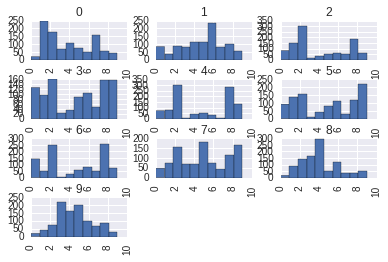

In [59]:
test_df['Cluster'].hist(by=test_df['Label'])

In [61]:
test_df.groupby(['Label','Cluster'])['Cluster'].count()

Label  Cluster
0      0           20
       1          246
       2          175
       3           68
       4          107
       5           74
       6           51
       7          160
       8           56
       9           43
1      0           84
       1           40
       2           91
       3           84
       4          115
       5          114
       6          236
       7           81
       8          100
       9           55
2      0           82
       1          152
       2          304
       3           17
       4           36
       5           51
       6           57
       7           52
       8          184
       9           65
                 ... 
7      0           48
       1           74
       2          158
       3           67
       4           67
       5          183
       6           76
       7           43
       8          117
       9          167
8      0           17
       1           91
       2          144
       3         

In [97]:
test_df['Vairance'] = pd.DataFrame(test_df.Label - test_df.Cluster)

In [17]:
test_df.head()

NameError: name 'test_df' is not defined

In [62]:
test_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,312,313,314,315,316,317,318,319,Label,Cluster
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.427663,0.405293,0.337779,0.364387,0.349651,0.365740,0.328424,0.387479,0.549681,0.548449,...,0.352891,0.354300,0.346112,0.563764,0.740324,0.690437,0.679684,0.823218,4.500000,4.502200
std,0.232181,0.237533,0.241078,0.174166,0.165566,0.209575,0.217668,0.178798,0.189887,0.238187,...,0.172539,0.181832,0.186240,0.169071,0.231417,0.223451,0.232479,0.192497,2.872425,2.877468
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.258664,0.228919,0.147721,0.242520,0.234644,0.217080,0.164286,0.262573,0.421242,0.381176,...,0.234909,0.231138,0.217552,0.446965,0.589172,0.539174,0.524083,0.693423,2.000000,2.000000
50%,0.408012,0.382922,0.307535,0.350371,0.332773,0.341496,0.303021,0.369695,0.534032,0.528937,...,0.348165,0.340175,0.324434,0.544235,0.718364,0.665807,0.653711,0.801951,4.500000,4.000000
75%,0.579507,0.555896,0.494863,0.476115,0.447602,0.490731,0.459659,0.495181,0.661072,0.692169,...,0.462126,0.463886,0.454750,0.660576,0.871595,0.816803,0.810049,0.932977,7.000000,7.000000
max,1.311494,1.777876,1.403263,1.384143,1.533438,2.632418,2.300130,1.783075,1.580732,1.933300,...,1.166120,1.197141,1.279142,1.558549,1.899446,1.801114,1.843321,1.781804,9.000000,9.000000


In [63]:
test_df.groupby('Cluster').count()

,0,1,2,3,4,5,6,7,8,9,...,311,312,313,314,315,316,317,318,319,Label
Cluster,,,,,,,,,,,,,,,,,,,,,
0,705,705,705,705,705,705,705,705,705,705,...,705,705,705,705,705,705,705,705,705,705
1,1003,1003,1003,1003,1003,1003,1003,1003,1003,1003,...,1003,1003,1003,1003,1003,1003,1003,1003,1003,1003
2,1809,1809,1809,1809,1809,1809,1809,1809,1809,1809,...,1809,1809,1809,1809,1809,1809,1809,1809,1809,1809
3,671,671,671,671,671,671,671,671,671,671,...,671,671,671,671,671,671,671,671,671,671
4,937,937,937,937,937,937,937,937,937,937,...,937,937,937,937,937,937,937,937,937,937
5,949,949,949,949,949,949,949,949,949,949,...,949,949,949,949,949,949,949,949,949,949
6,967,967,967,967,967,967,967,967,967,967,...,967,967,967,967,967,967,967,967,967,967
7,574,574,574,574,574,574,574,574,574,574,...,574,574,574,574,574,574,574,574,574,574
8,1390,1390,1390,1390,1390,1390,1390,1390,1390,1390,...,1390,1390,1390,1390,1390,1390,1390,1390,1390,1390


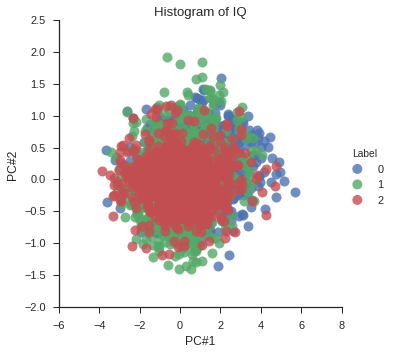

In [58]:
test_df_sample=test_df[0:10000]
test_df_sample=test_df_sample[test_df_sample.Label < 3]

sb.set_context("notebook", font_scale=1.1)
sb.set_style("ticks")


sb.lmplot('A','B',
           data=test_df_sample, 
           fit_reg=False, 
           hue="Label",  
           scatter_kws={"marker": "D", 
                        "s": 100})
plt.title('Histogram of IQ')
plt.xlabel('PC#1')
plt.ylabel('PC#2')

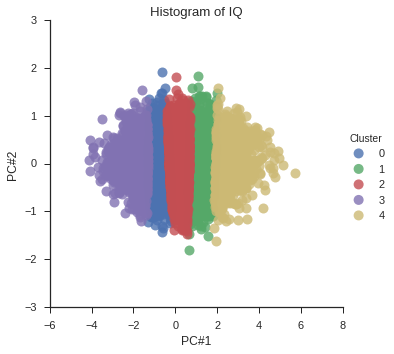

In [63]:
test_df_sample=test_df[0:10000]
test_df_sample=test_df_sample[test_df_sample.Cluster < 10]

sb.set_context("notebook", font_scale=1.1)
sb.set_style("ticks")


sb.lmplot('A','B',
           data=test_df_sample, 
           fit_reg=False, 
           hue="Cluster",  
           scatter_kws={"marker": "D", 
                        "s": 100})
plt.title('Histogram of IQ')
plt.xlabel('PC#1')
plt.ylabel('PC#2')

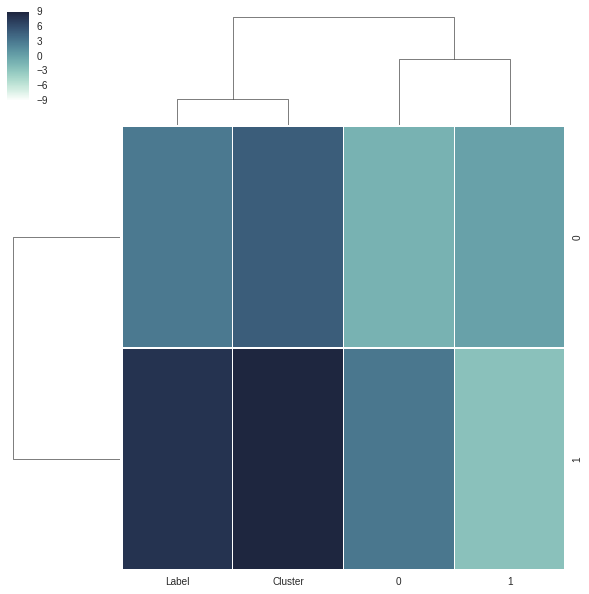

In [120]:
cmap = sb.cubehelix_palette(as_cmap=True, rot=-.3, light=1)
g = sb.clustermap(test_df[0:2], cmap=cmap, linewidths=.5)

In [74]:
reduced_train_data = reduced_train_data[0:501,]

In [75]:
reduced_train_data.shape

(501, 2)

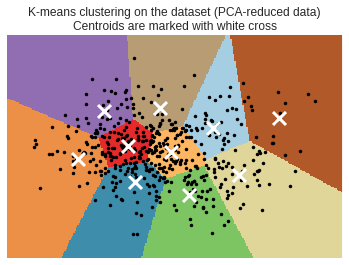

In [76]:
# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .05    # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_train_data[:, 0].min() - 1, reduced_train_data[:, 0].max() + 1
y_min, y_max = reduced_train_data[:, 1].min() - 1, reduced_train_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_train_data[:, 0], reduced_train_data[:, 1], 'k.', markersize=7)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [ ]:
raw_data['Cluster_Label'] = kmeans.labels_